# Time Series Final Project

This report is based on the excel spreadsheet named "data_exam.xlsx". 

*Authors: Sarra Ben Yahia & José Ángel García Sánchez*

#### Introduction
In this report, we will analyze the joint relationship between three time series: parkinson and VIX estimators with squared returns. To better understand this relationship, we will convert all series to annual variances, as variances are closely linked to squared returns. In contrast, volatilities have a natural relationship with absolute returns.

#### Why Use Parkinson and VIX Estimators to Explain Squared Returns?
The estimated historical volatility $\sigma$ of squared returns only captures linear relationships and assumes all events are equally weighted. In financial markets, volatility estimates based on a small dataset might lead to noisy measurements of the estimator due to sampling errors. Conversely, a large dataset uses information that is no longer relevant to the present state of the market. Therefore, using historical volatility as an exact number may not represent the actual value.  

To address this problem, alternative volatility estimators that use all data points other than closing prices, such as Close-to-Close, Garman and Klass (GK), Parkinson’s, Rogers and Satchell (RS), and Garman and Klass–Yang and Zhang (GK-YZ), can be used. In this report, we will focus on Parkinson and VIX estimators, they are widely used and provide a good balance between accuracy and computational efficiency. 

The Parkinson estimator is based on the high and low prices, while the VIX estimator is based on the implied volatilities of S&P 500 index options. By comparing their performance in explaining squared returns, we can gain insights into the joint relationship between these time series.  

#### Parkinson estimator
The Parkinson estimator is widely used to transform squared returns from a daily to an intraday frequency. As we learned in class, having intraday series can be extremely expensive, often costing up to 10k€ per series. Thus, a good approach is to use the Parkinson estimator to approximate intraday returns and obtain a well-explained variability of returns.  

The Parkinson estimator is a simplified version of the Garman Klass method, which includes a time component between the opening and closing prices. However, the Parkinson estimator is known for its high volatility, which can make it difficult to distinguish the signal from the noise. To overcome this issue, it is necessary to filter out the white noise from the information provided by the estimator. The Parkinson estimator is based on the high and low prices of a financial instrument and can be expressed as follows:  

$$\sigma_{Parkinson} = \sqrt{\frac{1}{4n\ln2}\sum_{k=1}^n\left(\log\left(\frac{H_{k}}{L_{k}}\right)\right)^2}$$

#### Extension of parkinson estimator
Even if the Parkinson estimate of variance is unbiased for continuous prices, prices are only sampled discretely. Then another approach or extension to using the Parkinson estimator could be to consider more accurate volatility estimators. According to [volatilites mesures article](https://www.mdpi.com/1099-4300/24/10/1410), while the Parkinson estimator is five times more efficient than the close-to-close estimator, the Garman Klass method is 7.4 times more efficient than close-to-close. Garman-Klass estimator (GK) is given by:  

$$\sigma_{GK} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\frac{1}{2}\left(\frac{\Delta H_i}{C_i} - \frac{\Delta L_i}{C_i}\right)^2 - (2\ln2 - 1)\left(\frac{\Delta C_i}{C_i}\right)^2\right)}$$

Moreover, an even more recent and improved version of the Garman Klass method is the Yang and Zhang developed version of GK (YZ-GK estimator), which provides even better accuracy and efficiency. The estimator is given by:  

$$\sigma_{YZ-GK} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\alpha\left(\frac{\Delta H_i}{C_i}\right)^2 + (1-\alpha)\left(\frac{\Delta C_i}{C_i}\right)^2 - 2\beta\left(\frac{\Delta H_i}{C_i}\right)\left(\frac{\Delta C_i}{C_i}\right)\right)}$$

#### Parkison transformation
To annualize the Parkinson variance, we can multiply the daily variance by 252, since there are 252 trading days in a year. This transformation is given by the following formula:

$$\sigma_{Annualised\ Parkinson}^2 = \sigma_{Daily\ Parkinson}^2 * 252$$

#### VIX
The VIX (CBOE Volatility Index) is a measure of the expected 30-day volatility of the U.S. stock market, derived from the prices of S&P 500 index options. It represents the market's expectation of near-term volatility. In our case VIX is expressed as percentage points.  
  
#### VIX transformations  
To yield volatility from percentage value we do:

$$\sigma_{VIX} = \frac{VIX\ Value}{100}$$

then to have annualised variance we do:
$$\sigma_{Annualised\ VIX}^2 = \sigma_{VIX}*\left(\sqrt{\frac{252}{30}}\right)^2$$



In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("./data_exam.xlsx", index_col=0)
print(df)


              VIX  Parkinson  Squared returns
2000-01-04  27.01   0.001406         0.000612
2000-01-05  26.41   0.000002         0.000326
2000-01-06  25.73   0.000045         0.000169
2000-01-07  21.72   0.001577         0.000723
2000-01-10  21.71   0.000109         0.000111
...           ...        ...              ...
2023-02-08  19.63   0.000117         0.000070
2023-02-09  20.71   0.000088         0.000179
2023-02-10  20.53   0.000004         0.000041
2023-02-13  20.34   0.000134         0.000110
2023-02-14  18.94   0.000019         0.000110

[5822 rows x 3 columns]


Explain the concept behind each column. What are these time series meant to represent? Trans- form these time series so that they are comparable in scale and order.

In [2]:
df_annualised = pd.DataFrame()
df_annualised['VIX_variance'] = ((df['VIX'] / 100) * np.sqrt(252/30))**2
df_annualised['parkinson_variance'] = df['Parkinson'] * 252
df_annualised['squared_returns'] = df['Squared returns'] * 252

In [3]:
df_annualised.describe()


,VIX_variance,parkinson_variance,squared_returns
count,5822.000000,5822.000000,5822.000000
mean,0.405662,0.039319,0.036665
std,0.451209,0.144904,0.086154
min,0.070173,0.000000,0.000363
25%,0.163935,0.001226,0.006558
50%,0.279160,0.007538,0.015306
75%,0.481022,0.030309,0.034871
max,5.743614,5.019508,1.552486


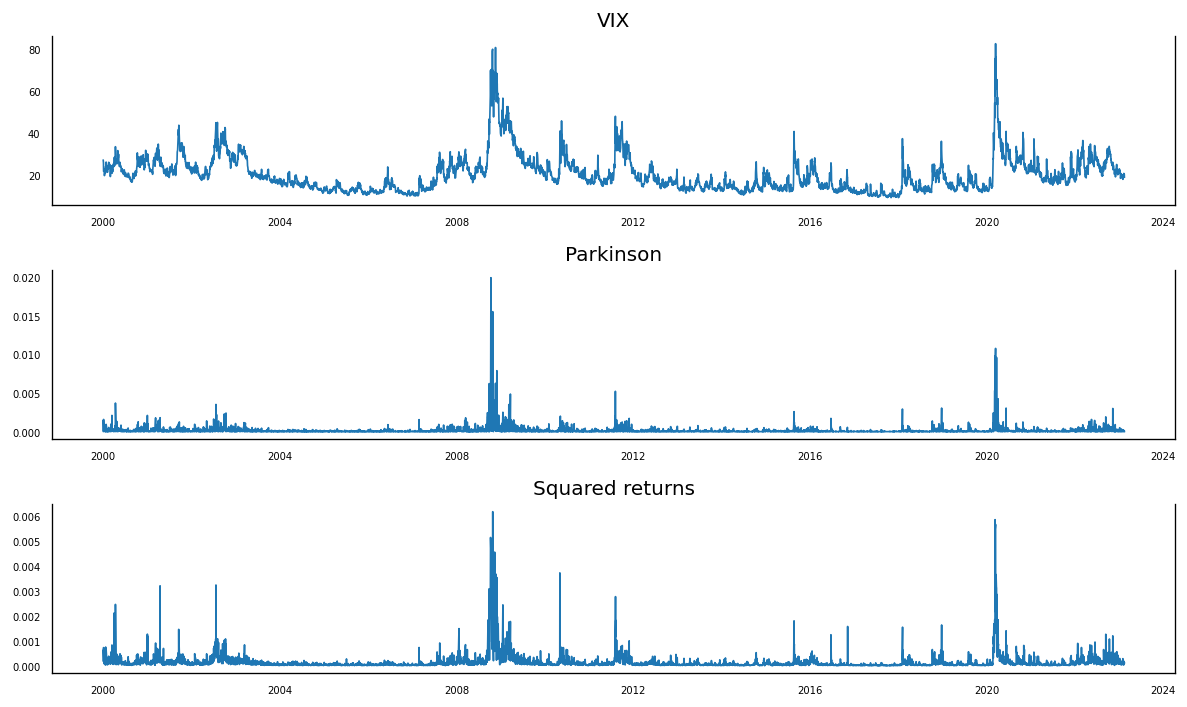

In [4]:
import matplotlib.pyplot as plt
# Visualizing each series
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(df.index, data, linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()


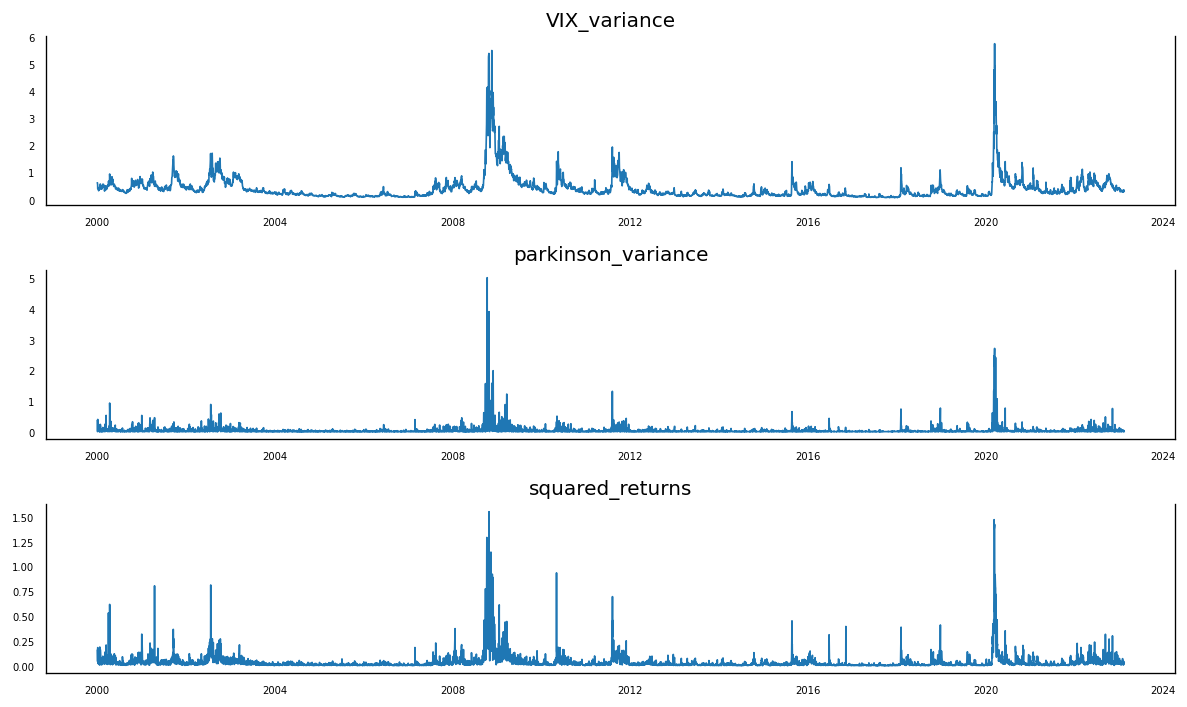

In [5]:
import matplotlib.pyplot as plt
# Visualizing each series
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df_annualised[df_annualised.columns[i]]
    ax.plot(df_annualised.index, data, linewidth=1)
    # Decorations
    ax.set_title(df_annualised.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()


<Axes: >

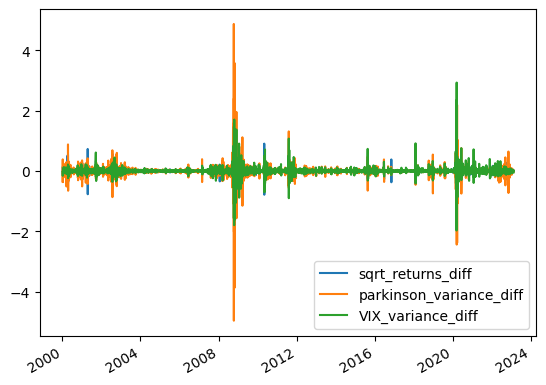

In [6]:
df_diff = pd.DataFrame()
df_diff["sqrt_returns_diff"] = df_annualised["squared_returns"].diff()
df_diff["parkinson_variance_diff"] = df_annualised["parkinson_variance"].diff()
df_diff["VIX_variance_diff"] = df_annualised["VIX_variance"].diff()
df_diff.plot()


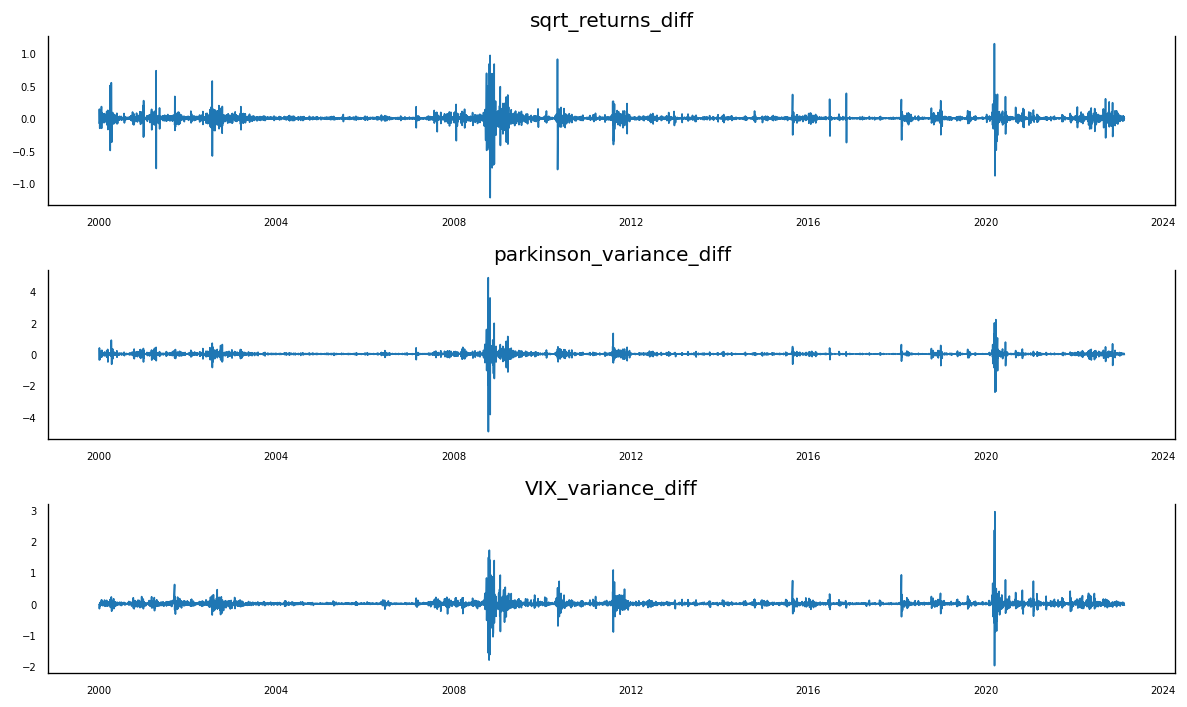

In [7]:
import matplotlib.pyplot as plt
# Visualizing each series
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df_diff[df_diff.columns[i]]
    ax.plot(df_diff.index, data, linewidth=1)
    # Decorations
    ax.set_title(df_diff.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()


Estimate and AR model on each of these time series. Determine the order of the AR process and show the estimates. What can you conclude from these estimations? (2 points)

Plot the fitted values for each model vs. the original time series. Why are these fitted values appealing for volatility measuring purposes? (2 points)

In [8]:
vix = df_annualised['VIX_variance'].values
parkinson = df_annualised['parkinson_variance'].values
squared_returns = df_annualised['squared_returns'].values


In [9]:
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings("ignore")

# function to estimate AR model and return AIC/BIC
def ar_order(y, max_order):
    aic = np.zeros(max_order+1)
    bic = np.zeros(max_order+1)
    for i in range(0, max_order+1):
        ar_model = sm.AutoReg(y, lags=i).fit()
        aic[i] = ar_model.aic
        bic[i] = ar_model.bic
    return aic, bic


# estimate AR model order for each time series
vix_aic, vix_bic = ar_order(vix, 30)
parkinson_aic, parkinson_bic = ar_order(parkinson, 30)
squared_returns_aic, squared_returns_bic = ar_order(squared_returns, 30)

# find the order that minimizes AIC/BIC
vix_order = np.argmin(vix_aic)
parkinson_order = np.argmin(parkinson_aic)
squared_returns_order = np.argmin(squared_returns_aic)

# fit AR model with chosen lag order
vix_ar_model = sm.AutoReg(vix, lags=vix_order).fit()
parkinson_ar_model = sm.AutoReg(parkinson, lags=parkinson_order).fit()
squared_returns_ar_model = sm.AutoReg(
    squared_returns, lags=squared_returns_order).fit()

# print estimated coefficients
print('------------VIX AR({}) model coefficients:------------'.format(vix_order))
print(vix_ar_model.params)
print('\n------------Parkinson AR({}) model coefficients:------------'.format(parkinson_order))
print(parkinson_ar_model.params)
print('\n------------Squared returns AR({}) model coefficients:------------'.format(squared_returns_order))
print(squared_returns_ar_model.params)


------------VIX AR(26) model coefficients:------------
[ 9.45400522e-03  7.35344436e-01  2.13914470e-01  4.37265037e-02
 -1.47902784e-01  1.30172065e-01 -1.40937408e-03 -2.17569604e-02
 -2.10914700e-02  8.98004356e-02 -4.76084979e-04 -1.69373715e-02
 -1.75260688e-02 -5.50378971e-02  4.46625377e-02  8.41546717e-03
  2.17490867e-02 -5.24041999e-02  1.49178511e-02  2.68682205e-02
 -1.62394512e-02 -4.53212964e-02 -1.43658144e-02  9.18310556e-03
  6.20891024e-02  2.96895108e-02 -4.34491222e-02]

------------Parkinson AR(29) model coefficients:------------
[ 0.00697808  0.06446679  0.3204932  -0.00698063 -0.03846231  0.0948754
  0.11556117  0.07299734 -0.00408928  0.05283014  0.06235643  0.19502587
 -0.0354412  -0.10072101 -0.0589172   0.01068118  0.01523856  0.0108018
 -0.00109857 -0.02710081  0.01163396  0.02338014 -0.0794988   0.06390964
  0.03360182 -0.03075183 -0.0494771   0.06214193  0.07207647 -0.02781253]

------------Squared returns AR(29) model coefficients:------------
[ 0.0037931

In [10]:
import matplotlib.pyplot as plt

# generate predicted values based on AR models
vix_ar_pred = vix_ar_model.predict()
parkinson_ar_pred = parkinson_ar_model.predict()
squared_returns_ar_pred = squared_returns_ar_model.predict()


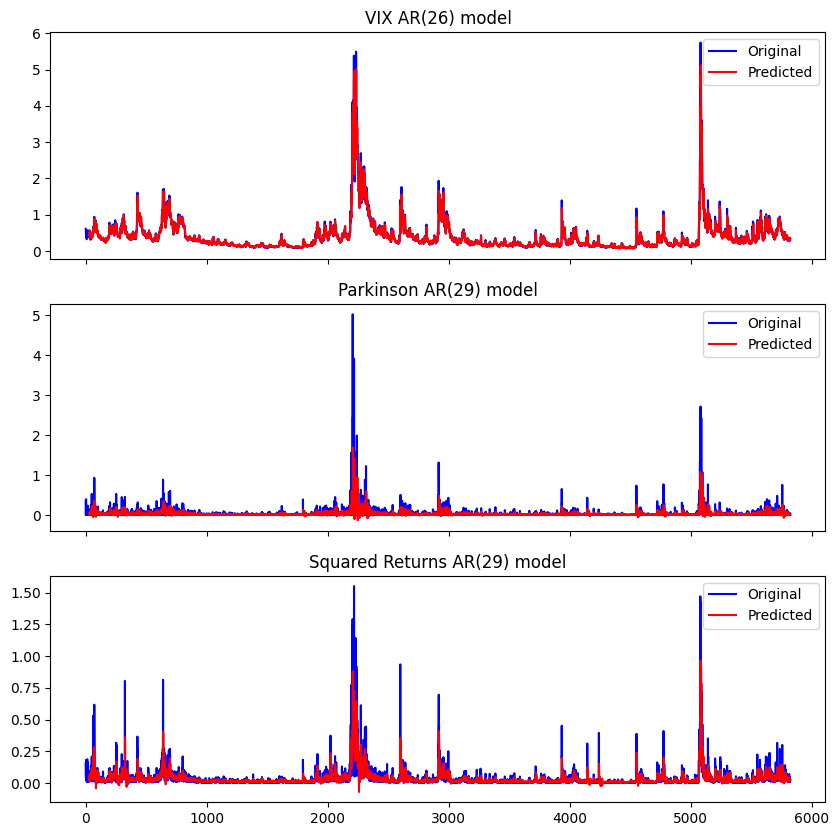

In [11]:
# plot original time series and fitted values
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# VIX series
axes[0].plot(vix, color='blue', label='Original')
axes[0].plot(vix_ar_pred, color='red', label='Predicted')
axes[0].set_title('VIX series')
axes[0].set_title('VIX AR({}) model'.format(vix_order))
axes[0].set_xticklabels([])
axes[0].set_xticklabels([])
axes[0].legend()
axes[0].legend()

# Parkinson series
axes[1].plot(parkinson, color='blue', label='Original')
axes[1].plot(parkinson_ar_pred, color='red', label='Predicted')
axes[1].set_title('Parkinson series')
axes[1].set_title('Parkinson AR({}) model'.format(parkinson_order))
axes[1].set_xticklabels([])
axes[1].set_xticklabels([])
axes[1].legend()
axes[1].legend()

# Squared returns series
axes[2].plot(squared_returns, color='blue', label='Original')
axes[2].plot(squared_returns_ar_pred, color='red', label='Predicted')
axes[2].set_title('Squared Returns series')
axes[2].set_title('Squared Returns AR({}) model'.format(squared_returns_order))
axes[2].legend()
axes[2].legend()

plt.show()


Estimate an HAR model on each time series. Present the estimated coefficients of the model and compare the loglikelihood of each model to the one obtained from the AR estimations. Which model do you prefer? (4 points). Retain the fitted values of the model you have selected for each of the three time series.

In [12]:
from scipy.stats import norm

# Optimization
def ML_HAR(para, x, plot=False):
    phi0 = para[0]
    phi1 = para[1]
    phi2 = para[2]
    phi3 = para[3]

    # computing moving averages
    ma5 = x.rolling(5).mean().shift(1)
    ma20 = x.rolling(20).mean().shift(1)
    ma1 = x.shift(1)

    combination = pd.concat([x, ma1, ma5, ma20], axis=1)
    combination = np.log(combination)
    combination = combination.dropna()
    combination.columns = ['ini', 'ma1', 'ma5', 'ma20']
    expected = phi0+phi1*combination['ma1']+phi2 * \
        combination['ma5']+phi3*combination['ma20']
    temp = pd.concat([combination['ini'], expected], axis=1)
    error = combination['ini']-expected
    sigma = np.nanstd(error)
    # print(para)
    density = norm.pdf(combination['ini'], expected, sigma)
    criterion = np.nansum(np.log(density))
    if plot == True:
        temp.plot()
    return -criterion


In [13]:
from scipy.stats import norm

# Optimization
def ML_HAR_fitted_values(para, x, plot=False):
    phi0 = para[0]
    phi1 = para[1]
    phi2 = para[2]
    phi3 = para[3]

    # computing moving averages
    ma5 = x.rolling(5).mean().shift(1)
    ma20 = x.rolling(20).mean().shift(1)
    ma1 = x.shift(1)

    combination = pd.concat([x, ma1, ma5, ma20], axis=1)
    combination = np.log(combination)
    combination = combination.dropna()
    combination.columns = ['initial', 'ma1', 'ma5', 'ma20']
    expected = phi0+phi1*combination['ma1']+phi2 * \
        combination['ma5']+phi3*combination['ma20']
    temp = pd.concat([combination['initial'], expected], axis=1)
    error = combination['initial']-expected
    sigma = np.nanstd(error)
    # print(para)
    density = norm.pdf(combination['initial'], expected, sigma)
    criterion = np.nansum(np.log(density))
    if plot == True:
        temp.plot()
    return temp[0]


### VIX

In [15]:
vix = df_annualised['VIX_variance']
parkinson = df_annualised['parkinson_variance']
squared_returns = df_annualised['squared_returns']

In [16]:
from scipy.optimize import minimize
x0 = np.array([0.1, 0.8, 1, 1])
res_EV = minimize(ML_HAR, x0, method='BFGS', args=(vix),
                  hess=True, options={'disp': True})


         Current function value: -3169.624755
         Iterations: 18
         Function evaluations: 372
         Gradient evaluations: 72


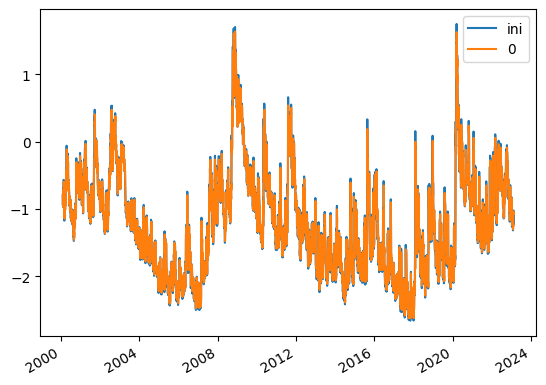

In [17]:
fitted_vix = ML_HAR(res_EV.x, vix, True)


In [18]:
fitted_vix = ML_HAR_fitted_values(res_EV.x, vix, False)

### Parkinson

In [19]:
df_annualised.isna().sum()

VIX_variance          0
parkinson_variance    0
squared_returns       0
dtype: int64

In [20]:
y= parkinson.values
x= df_annualised[["squared_returns","VIX_variance"]].values


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
para=[model.intercept_,model.coef_[0],model.coef_[1],0]
#ml_taylor(para,y,x,False)

In [22]:
model.coef_

array([ 1.53946315, -0.04977544])

In [23]:
model.intercept_

0.003066317619333722

In [24]:
y_pred = model.intercept_ + model.coef_[0] * x[:,0]+ model.coef_[1] * x[:,1]

In [25]:
fit=pd.DataFrame(y_pred)
fit.index=data.index
fit.columns=["Fit"]

residuals=y-y_pred
residuals_pd=pd.DataFrame([residuals])
residuals_pd=residuals_pd.T
residuals_pd.index=data.index
residuals_pd.columns=["Residuals"]

<Axes: >

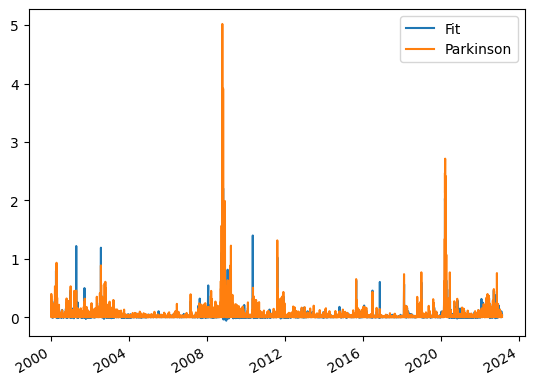

In [26]:
pd.concat([fit,pd.DataFrame(y,index=fit.index,columns=["Parkinson"])],axis=1).plot()

<Axes: >

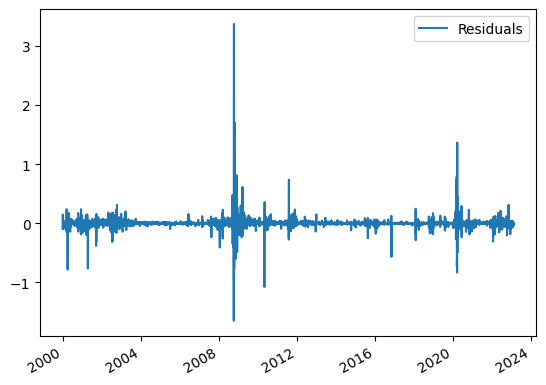

In [27]:
residuals_pd.plot()

In [28]:
fitted_parkinson = fit["Fit"]

### Squared returns

In [29]:
res_EV = minimize(ML_HAR, x0, method='BFGS', args=(
    squared_returns), hess=True, options={'disp': True})


Optimization terminated successfully.
         Current function value: 6979.159745
         Iterations: 16
         Function evaluations: 115
         Gradient evaluations: 23


6979.159744829718

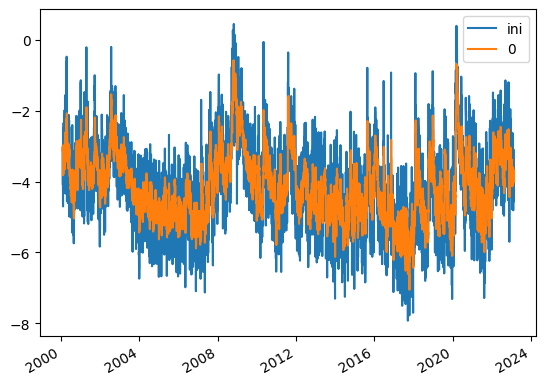

In [30]:
ML_HAR(res_EV.x, squared_returns, True)


In [31]:
fitted_returns = ML_HAR_fitted_values(res_EV.x, squared_returns, False)

In [32]:
df_har = pd.DataFrame()
df_har["vix"] = fitted_vix
df_har["parkinson"] = fitted_parkinson
df_har["squared_returns"] = fitted_returns
df_har

,vix,parkinson,squared_returns
2000-02-02,-0.776819,0.007113,-2.992710
2000-02-03,-0.802779,0.058200,-3.156328
2000-02-04,-0.892662,0.019464,-3.033324
2000-02-07,-0.936205,-0.004680,-3.384443
2000-02-08,-0.837509,0.023190,-3.823909
...,...,...,...
2023-02-08,-1.228148,0.014283,-3.659809
2023-02-09,-1.136087,0.054765,-3.985185
2023-02-10,-1.037866,0.001330,-3.756338
2023-02-13,-1.050586,0.028612,-4.030046


5. Test for the stationnarity of the esimtated time series. Comment your results. (3 points)

In [33]:
from statsmodels.tsa.stattools import adfuller, kpss

# Define the columns of interest

# Loop through each column and perform the ADF, KPSS

for col in df_har.columns:
    print(f'------------Testing column: {col}------------')

    # ADF test
    result_adf = adfuller(df_har[col])
    print('------------ ADF Statistic: %f' % result_adf[0])
    print('p-value: %f' % result_adf[1])
    for key, value in result_adf[4].items():
        print('Critical Value %s: %.3f' % (key, value))

    # KPSS test
    result_kpss = kpss(df_har[col])
    print('------------ KPSS Statistic: %f' % result_kpss[0])
    print('p-value: %f' % result_kpss[1])
    for key, value in result_kpss[3].items():
        print('Critical Value %s: %.3f' % (key, value))

    # Check if the time series is stationary or not
    if result_adf[1] < 0.05 and result_kpss[1] > 0.05:
        print("The time serie is stationary.")
    else:
        print("The time serie is not stationary.")

    print(' ' * 50)


------------Testing column: vix------------
------------ ADF Statistic: -5.046172
p-value: 0.000018
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.807440
p-value: 0.010000
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time serie is not stationary.
                                                  
------------Testing column: parkinson------------
------------ ADF Statistic: -8.755255
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.144487
p-value: 0.100000
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time serie is stationary.
                                                  
------------Testing column: squared_returns------------
------------ ADF Statistic: -5.282773
p-value: 0.000006
Critical Value 1%: -3.431
Critical Value

6. Estimate a VAR(p) model on your three stationnary fitted values. Comment your results. (4 points)

In [34]:
from statsmodels.tsa.api import VAR

In [35]:
df_har.describe()

,vix,parkinson,squared_returns
count,5802.000000,5802.000000,5802.000000
mean,-1.219321,0.039171,-4.156787
std,0.724084,0.116680,0.924468
min,-2.620162,-0.060546,-7.052051
25%,-1.801431,0.002609,-4.853813
50%,-1.280655,0.011442,-4.221857
75%,-0.743089,0.034266,-3.528371
max,1.633396,2.205594,-0.587873


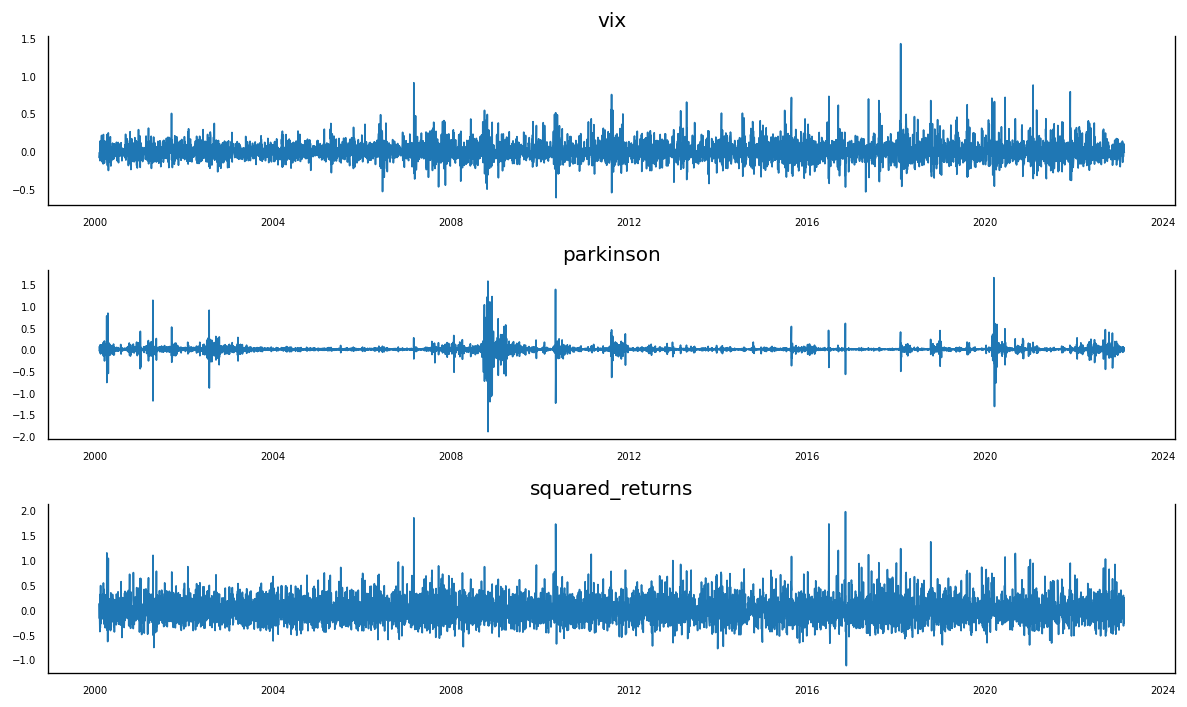

In [36]:
df_har_stationnary = df_har.diff().dropna()
import matplotlib.pyplot as plt
# Visualizing each series
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df_har_stationnary[df_har_stationnary.columns[i]]
    ax.plot(df_har_stationnary.index, data, linewidth=1)
    # Decorations
    ax.set_title(df_har_stationnary.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()



In [37]:
from statsmodels.tsa.stattools import adfuller, kpss

# Define the columns of interest

# Loop through each column and perform the ADF, KPSS

for col in df_har_stationnary.columns:
    print(f'------------Testing column: {col}------------')

    # ADF test
    result_adf = adfuller(df_har_stationnary[col])
    print('------------ ADF Statistic: %f' % result_adf[0])
    print('p-value: %f' % result_adf[1])
    for key, value in result_adf[4].items():
        print('Critical Value %s: %.3f' % (key, value))

    # KPSS test
    result_kpss = kpss(df_har_stationnary[col])
    print('------------ KPSS Statistic: %f' % result_kpss[0])
    print('p-value: %f' % result_kpss[1])
    for key, value in result_kpss[3].items():
        print('Critical Value %s: %.3f' % (key, value))

    # Check if the time series is stationary or not
    if result_adf[1] < 0.05 and result_kpss[1] > 0.05:
        print("The time serie is stationary.")
    else:
        print("The time serie is not stationary.")

    print(' ' * 50)


------------Testing column: vix------------
------------ ADF Statistic: -31.379007
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.013302
p-value: 0.100000
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time serie is stationary.
                                                  
------------Testing column: parkinson------------
------------ ADF Statistic: -17.465649
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.017290
p-value: 0.100000
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time serie is stationary.
                                                  
------------Testing column: squared_returns------------
------------ ADF Statistic: -17.798442
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 

In [39]:
#########################################################################
####################### Estimation of a VAR model #######################
#########################################################################

model = VAR(df_har_stationnary)
# Order selection
x = model.select_order(40)
x.summary()


,AIC,BIC,FPE,HQIC
0,-11.56,-11.55,9.581e-06,-11.55
1,-12.08,-12.06,5.691e-06,-12.07
2,-12.16,-12.14,5.228e-06,-12.15
3,-12.24,-12.20,4.841e-06,-12.23
4,-12.33,-12.28,4.434e-06,-12.31
5,-12.39,-12.33,4.170e-06,-12.37
6,-12.43,-12.36,4.003e-06,-12.41
7,-12.44,-12.36,3.962e-06,-12.41
8,-12.45,-12.36*,3.915e-06,-12.42
9,-12.46,-12.36,3.890e-06,-12.42


7. Plot an impulse response function obtained from your VAR model and comment the results (4 points)